In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load configuration for plots and exports
import utility.plots_cfg as plt_c
from utility.plots_save import export_figs

# Load configuration for plots
plt_c.load_cfg()

In [2]:
# Load data
script_dir = os.path.dirname(__file__)
ai_data_path = os.path.abspath(
    os.path.join(script_dir, "../data/raw/AI_SaaS_Worldwide.csv")
)
low_code_data_path = os.path.abspath(
    os.path.join(script_dir, "../data/raw/Low-code_Worldwide.csv")
)
vertical_saas_data_path = os.path.abspath(
    os.path.join(script_dir, "../data/raw/Vertical_SaaS_Worldwide.csv")
)

In [3]:
# Read data into a DataFrame
df_ai_saas= pd.read_csv(ai_data_path).reset_index()
df_low_code = pd.read_csv(low_code_data_path).reset_index()
df_vertical_saas = pd.read_csv(vertical_saas_data_path).reset_index()

In [4]:
# Clean and preprocess data
def clean_dataframe(df, date_col, interest_col):
    """Clean and standardize dataframe columns."""
    df = df.copy()
    df.rename(
        columns={date_col: "Month", interest_col: "Interest"},
        inplace=True,
    )
    df = df.drop(df.index[0]).reset_index(
        drop=True
    )  # Drop the first row and reset index
    df["Month"] = pd.to_datetime(df["Month"])
    df["Interest"] = pd.to_numeric(
        df["Interest"], errors="coerce"
    )  # Convert Interest to numeric
    return df

In [5]:
# Apply cleaning function to each dataframe
df_ai_saas = clean_dataframe(df_ai_saas, "index", "Category: All categories")
df_low_code = clean_dataframe(df_low_code, "index", "Category: All categories")
df_vertical_saas = clean_dataframe(
    df_vertical_saas, "index", "Category: All categories"
)

In [6]:
# Export data into data folder
export_path = os.path.abspath(os.path.join(script_dir, "../data/processed"))
df_ai_saas.to_csv(os.path.join(export_path, "df_ai_saas.csv"), index=False)
print(df_ai_saas.head())
df_low_code.to_csv(os.path.join(export_path, "df_low_code.csv"), index=False)
print(df_low_code.head())
df_vertical_saas.to_csv(os.path.join(export_path, "df_vertical_saas.csv"), index=False)
print(df_vertical_saas.head())
print(f"Data exported to {export_path}")

       Month  Interest
0 2019-01-01         7
1 2019-02-01         7
2 2019-03-01         5
3 2019-04-01         7
4 2019-05-01         6
       Month  Interest
0 2019-01-01        39
1 2019-02-01        30
2 2019-03-01        25
3 2019-04-01        26
4 2019-05-01        28
       Month  Interest
0 2019-01-01        13
1 2019-02-01        11
2 2019-03-01        10
3 2019-04-01        17
4 2019-05-01        18
Data exported to d:\Admin Files\Desktop\research-report-project\data\processed


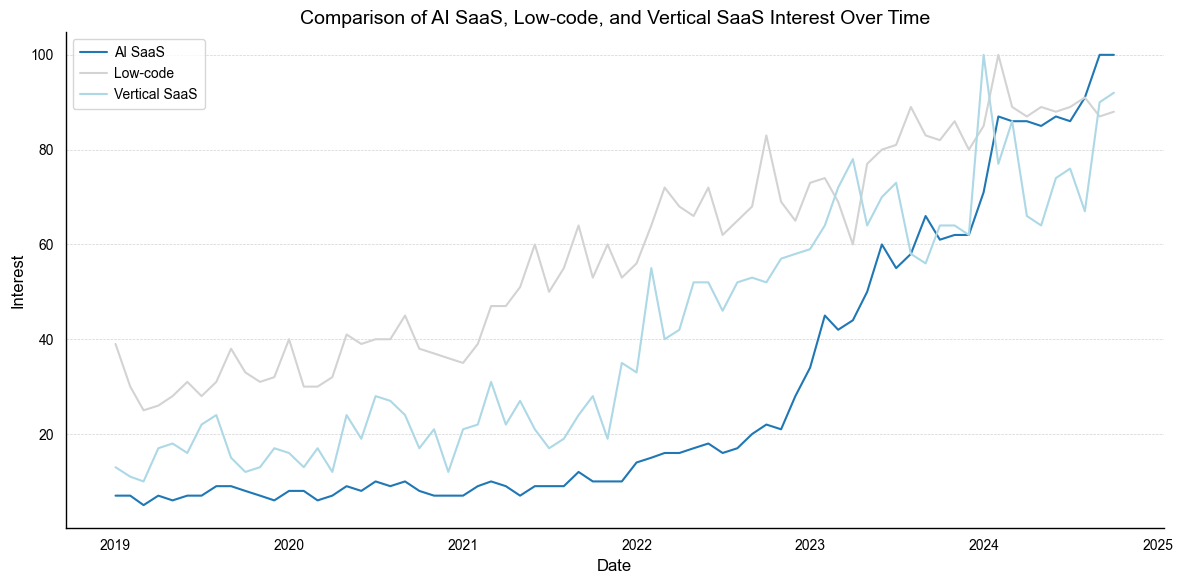

In [7]:
# Create a line chart comparing all three datasets
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each dataset
ax.plot(df_ai_saas["Month"], df_ai_saas["Interest"], label="AI SaaS")
ax.plot(
    df_low_code["Month"], df_low_code["Interest"], label="Low-code", color="lightgray"
)
ax.plot(
    df_vertical_saas["Month"],
    df_vertical_saas["Interest"],
    label="Vertical SaaS",
    color="lightblue",
)

# Customize the plot
ax.set_title("Comparison of AI SaaS, Low-code, and Vertical SaaS Interest Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Interest")
ax.legend()
plt.tight_layout()

plt.show()

In [8]:
# Path for exporting figures
export_dir: str = os.path.abspath(os.path.join(script_dir, "../reports/figures/"))
export_figs(
    export_dir, fig, 1, "Comparison_AI_SaaS_Low_code_Vertical_SaaS_Interest.png"
)

# Close the figure to free up memory
plt.close(fig)
print(f"Figure saved to {export_dir}")

Figure saved to d:\Admin Files\Desktop\research-report-project\reports\figures
